# Avacado Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt              #for plotting and EDA
import seaborn as sns                        #for plotting and Eda
from sklearn.model_selection import train_test_split         #for splitting dataset into train and test
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.metrics import mean_absolute_error              #for checking model accuracy
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.ensemble import RandomForestRegressor           #regression model
from sklearn.model_selection import cross_val_score          #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
df.shape

(1517, 14)

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
df.apply(lambda x: len(x.unique()))

Unnamed: 0        52
Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

The dataset only has 1 unique value for type column hence we can drop that column from the dataset.



In [6]:
df.drop('type', axis = 1, inplace = True)

# Checking and treating missing values

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

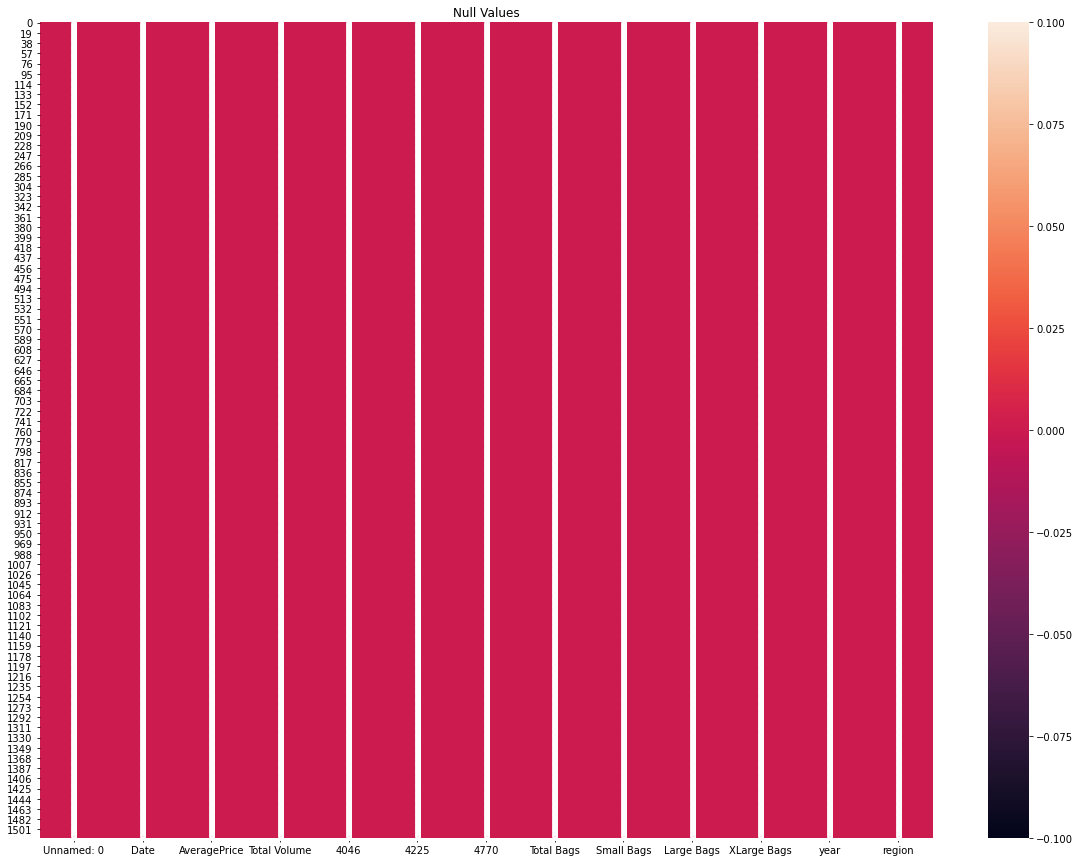

In [8]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           #Visual representation of no null values present in dataset
plt.title('Null Values')
plt.show()

# Feature Engineering

In [9]:
df['Month'] = df['Date'].apply(lambda x: x[3:5])
df['Month'] = df['Month'].astype(float)

We created a new column 'Month' from the date column.

In [10]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
region           object
Month           float64
dtype: object

In [11]:
df.drop('Date', axis = 1, inplace = True)

In [12]:
df.head(10)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11.0
5,5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,2015,Albany,11.0
6,6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,2015,Albany,11.0
7,7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,2015,Albany,11.0
8,8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,2015,Albany,11.0
9,9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,2015,Albany,10.0


# Describing the dataset

In [13]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.166777
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.391243
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000


# EDA and Data Visualisation

In [14]:
cont_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
cate_cols = ['year', 'region', 'Month']

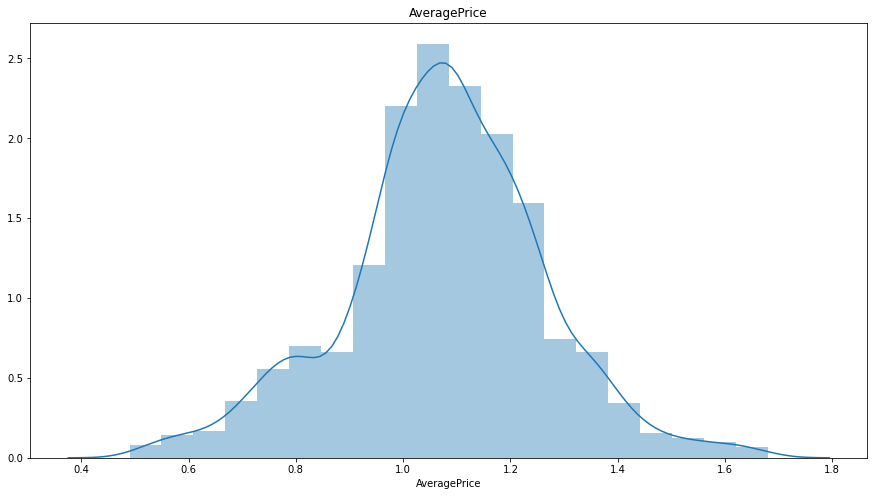

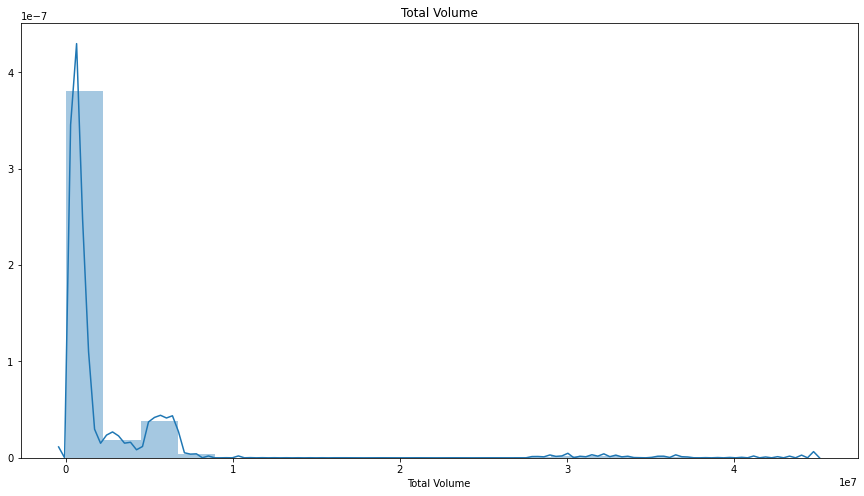

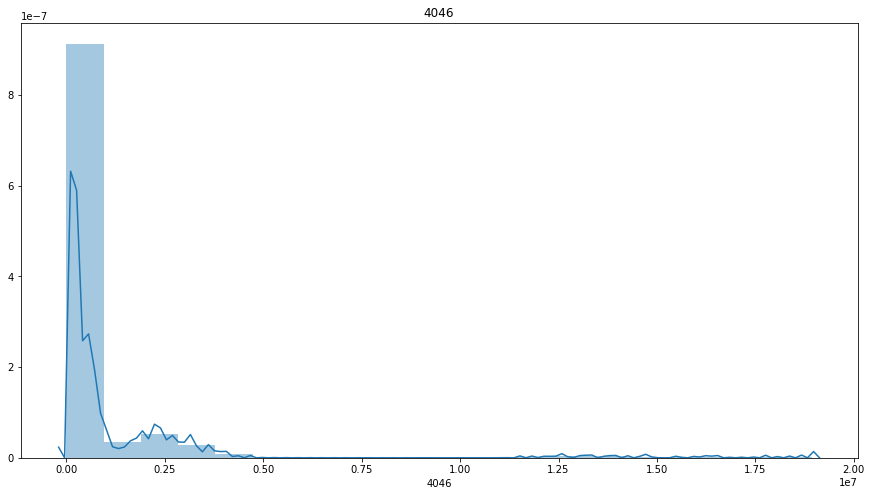

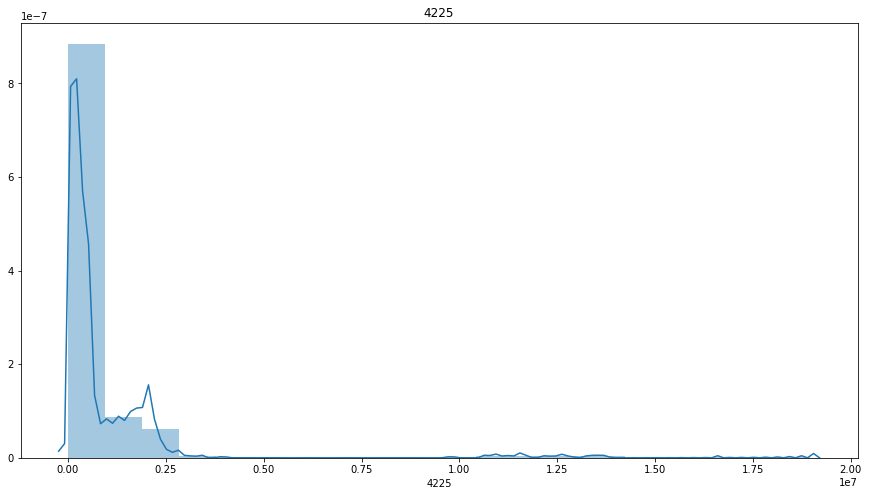

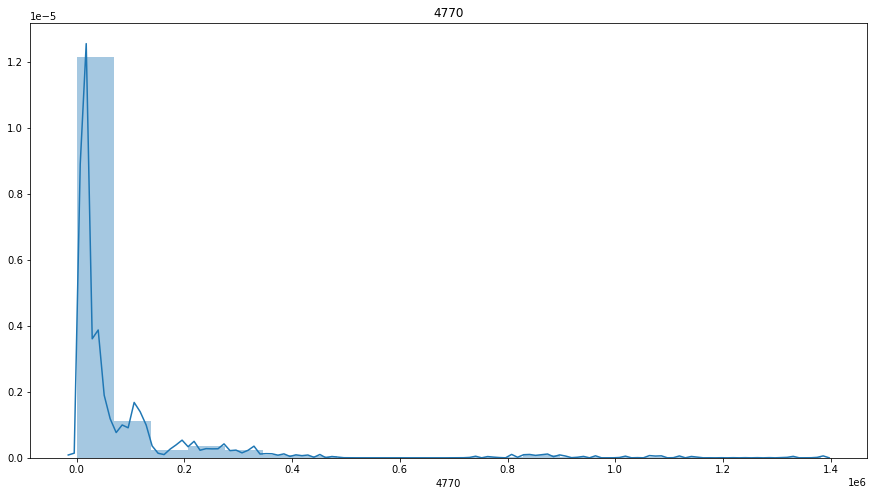

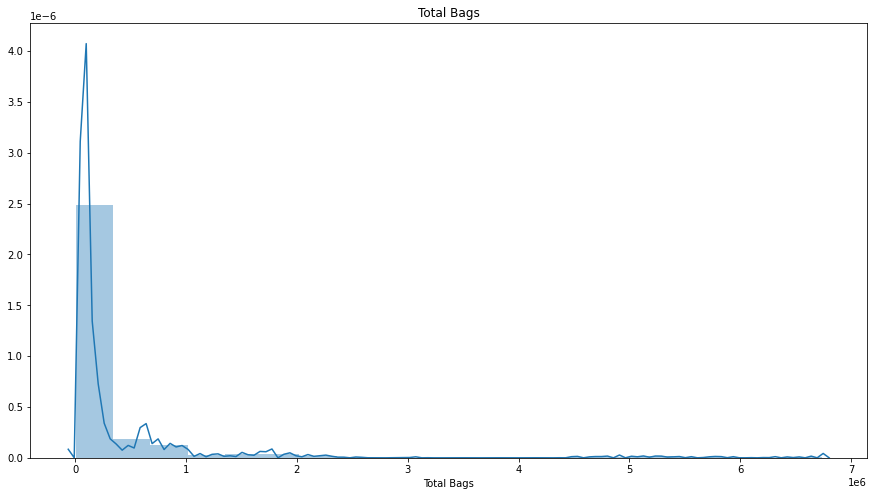

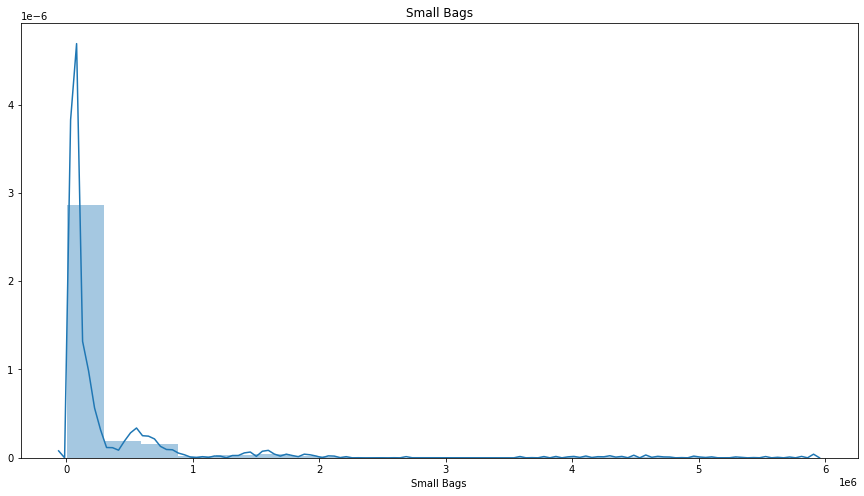

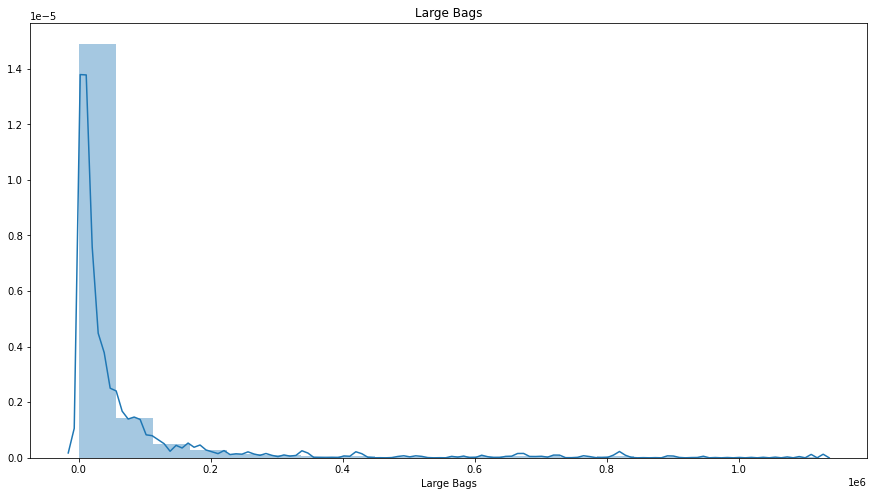

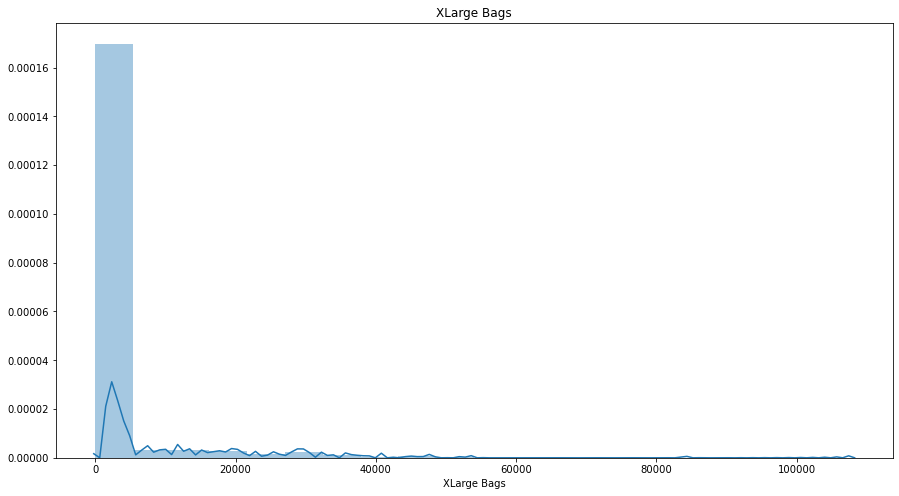

In [15]:
for i in df[cont_cols]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 20)
    plt.title(i)
    plt.show()

Average sales has the perfect bell shaped graph, while other graphs are more centered towards 0 and shows right tail skewness.

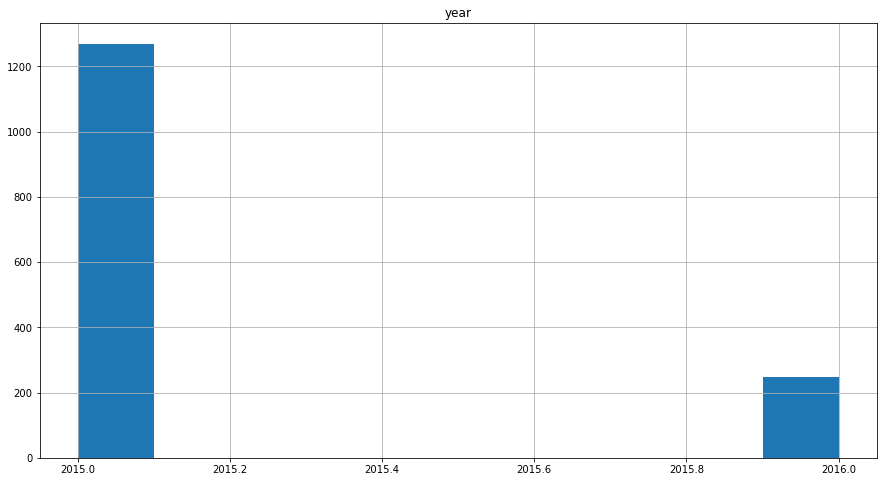

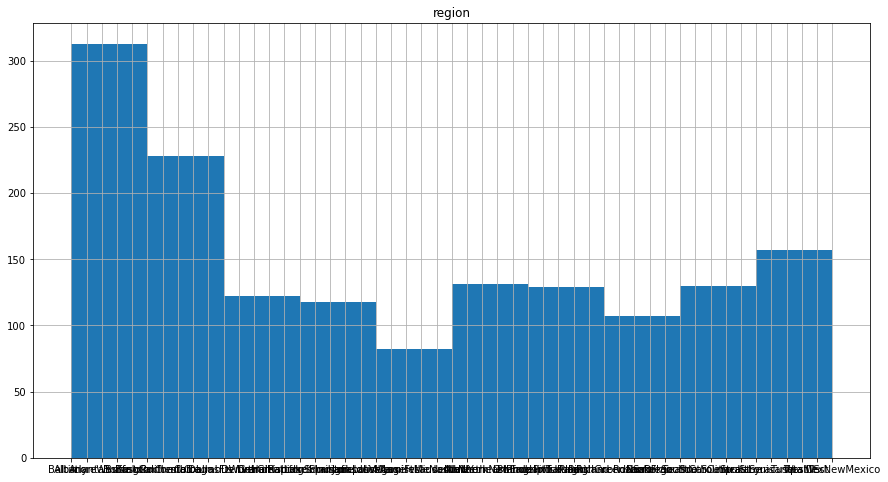

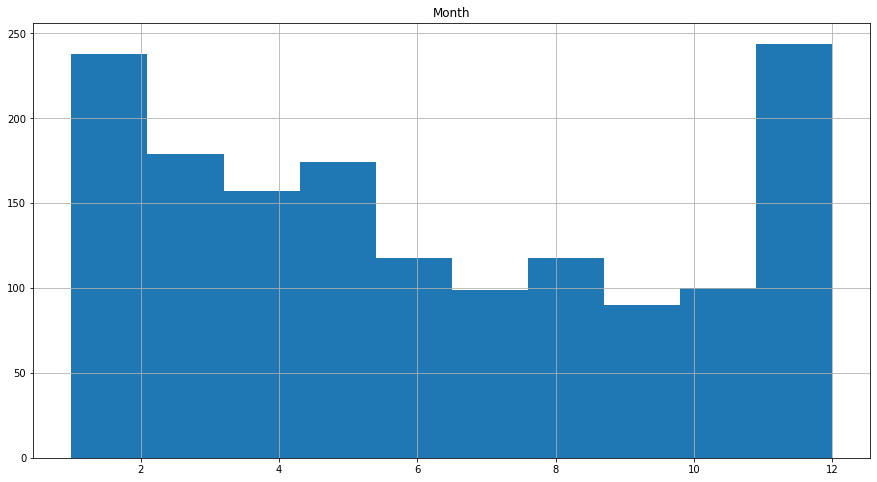

In [16]:
for i in cate_cols:
    plt.figure(figsize = (15, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

Most of the data is taken in 2015 and is acquiered in the month of December and January.

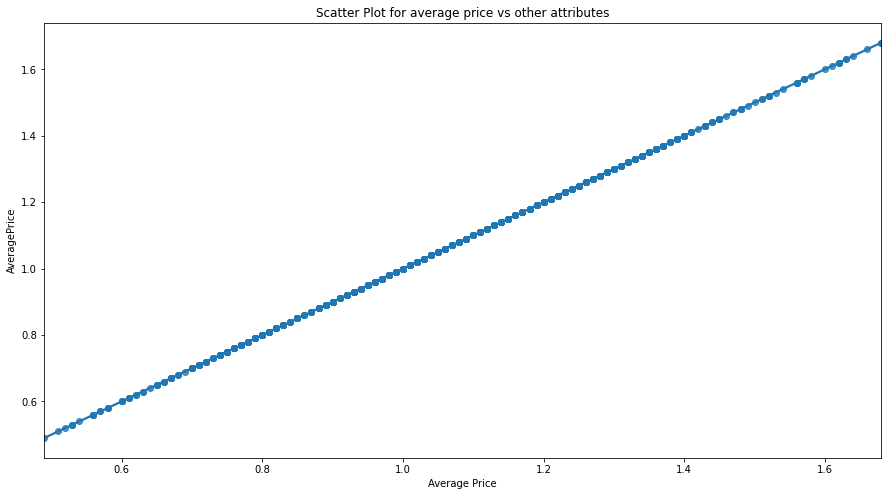

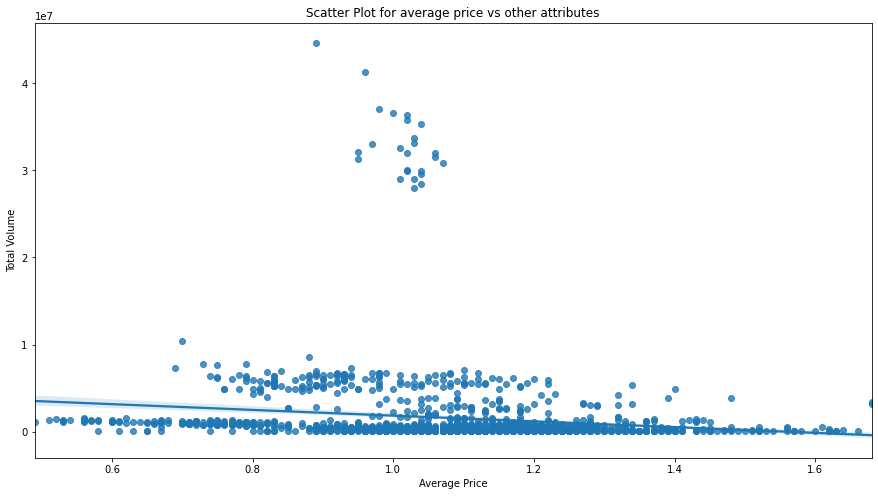

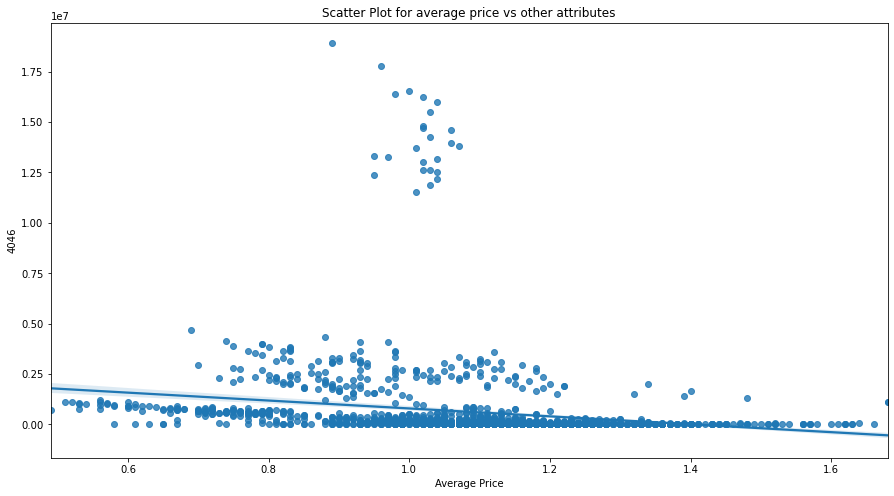

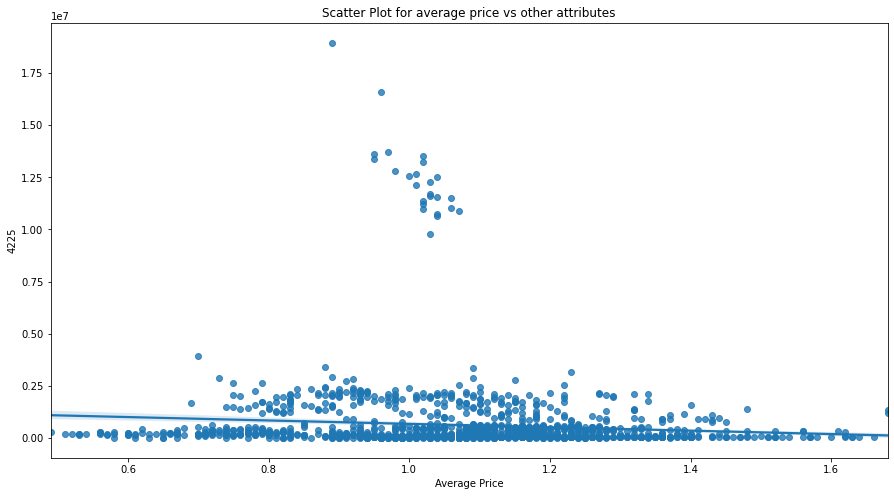

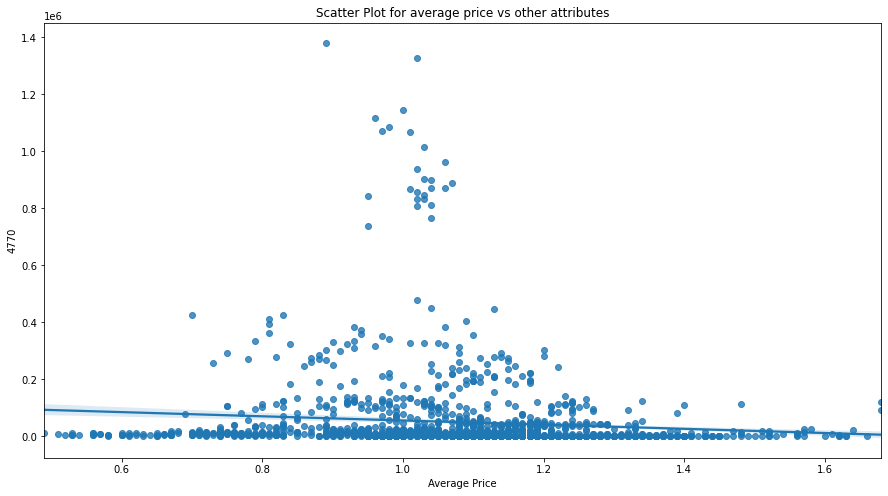

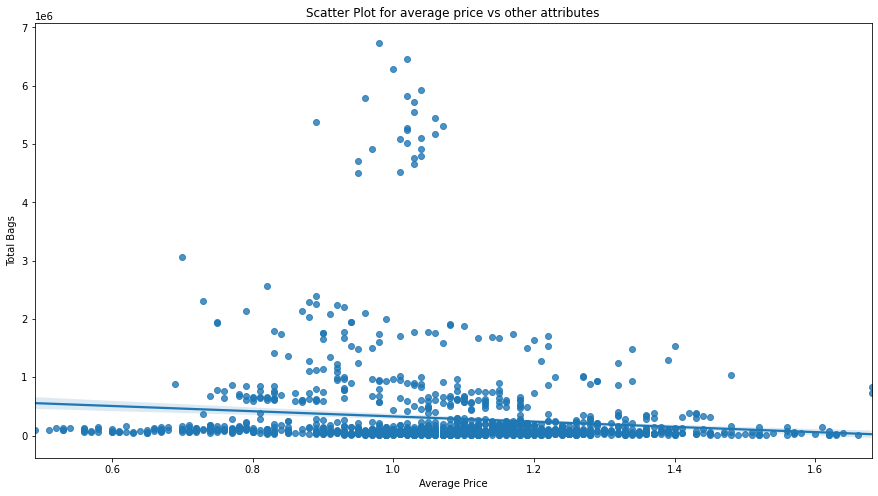

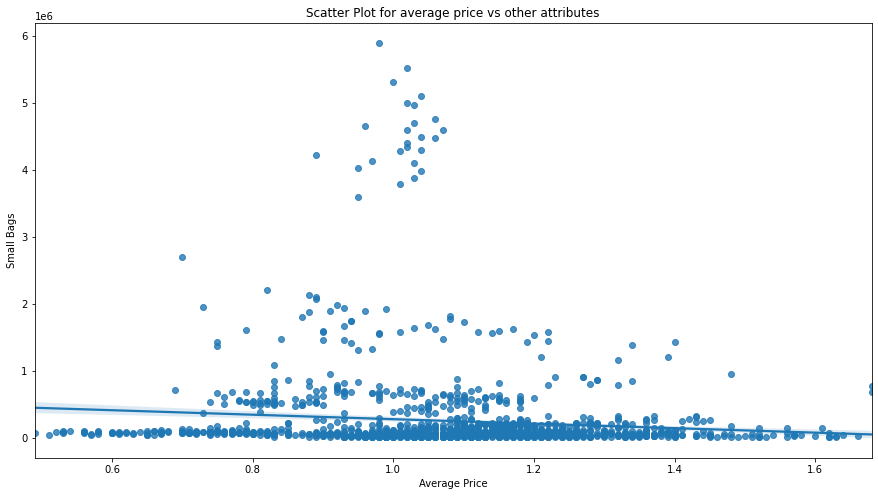

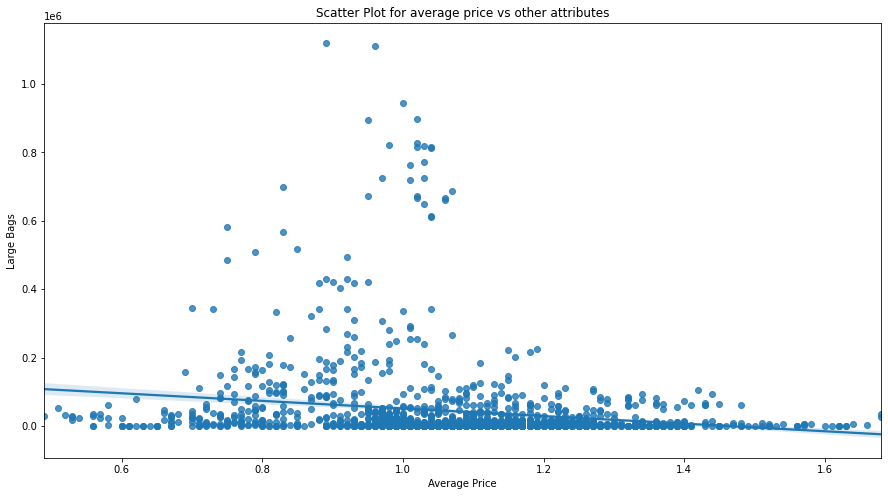

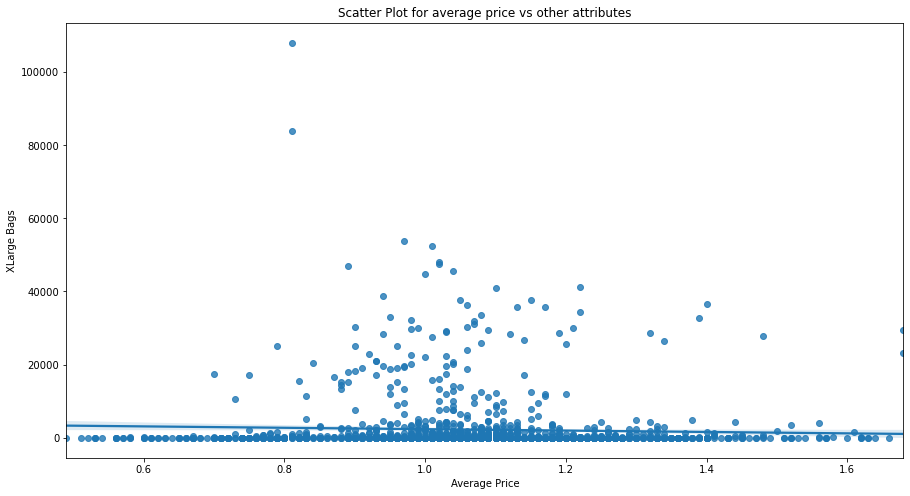

In [17]:
for i in cont_cols:                                      #bivariate analysis
    plt.figure(figsize = (15, 8))
    sns.regplot(df['AveragePrice'], df[i])
    plt.title('Scatter Plot for average price vs other attributes')
    plt.xlabel('Average Price')
    plt.ylabel(i)  
    plt.show()

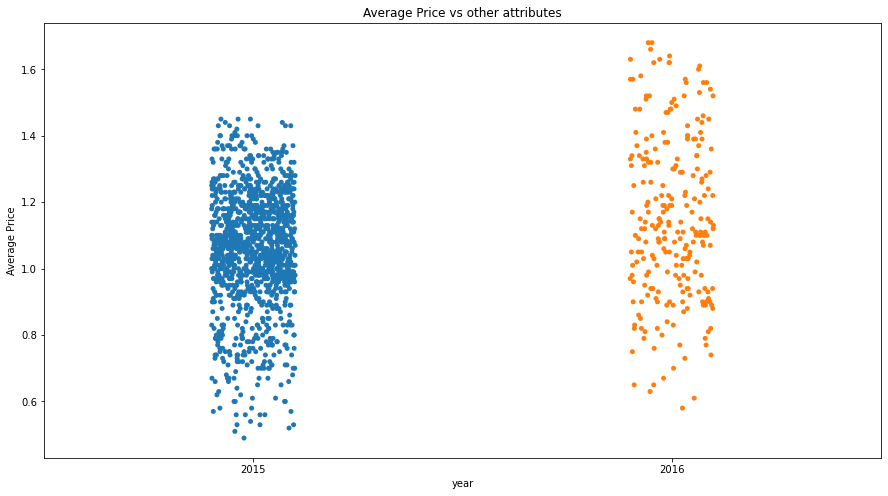

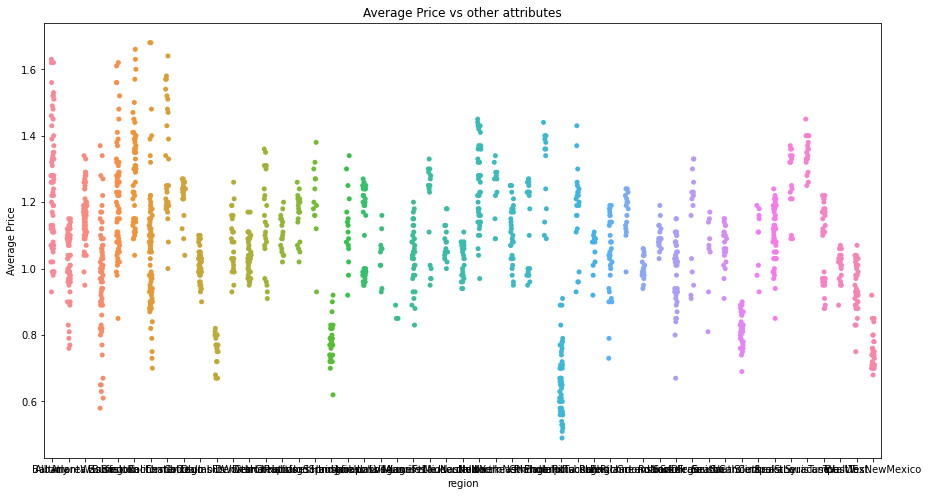

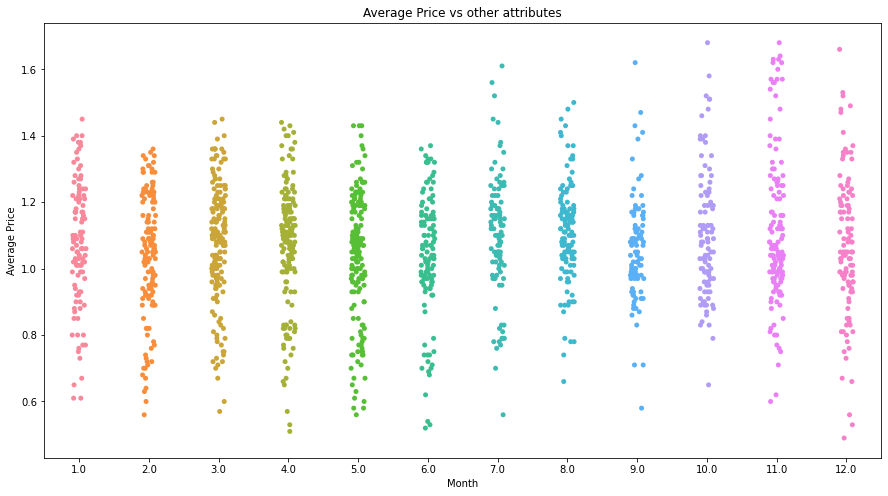

In [18]:
for i in cate_cols:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df[i], df['AveragePrice'])
    ax.set(xlabel = i, ylabel = 'Average Price')
    plt.title('Average Price vs other attributes')
    plt.show()

Prices seems to be highest in the month of November and prices have high range in the month of December.

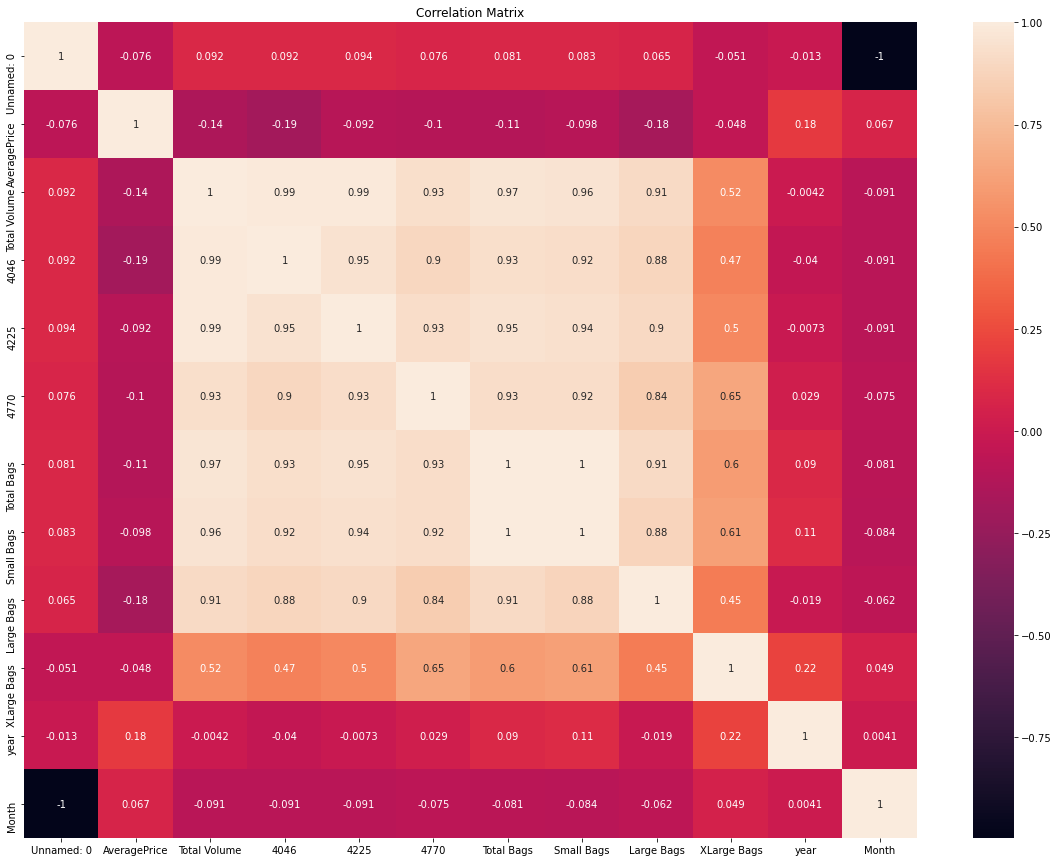

In [19]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

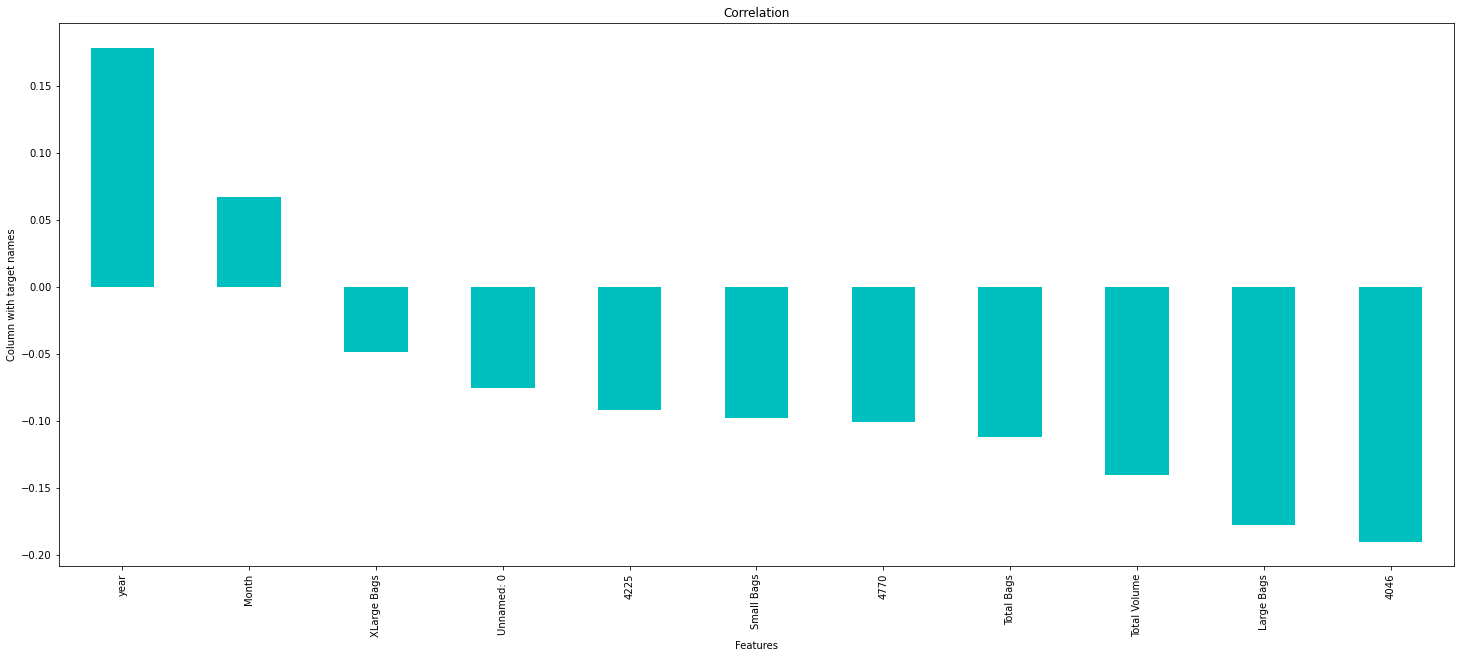

In [20]:
plt.figure(figsize = (25, 10))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Most of the columns have negative correlation with Average Price.

4046 seems to have highest correlation with Average Price at -0.19 followed by large bags at -0.18.

Total volume, 4046, 4225, 4770, Total bags, small bags and large bags all have high correlation amongst them as seen in the heatmap.

# Outliers and Skewness

In [21]:
cont_cols.remove('AveragePrice')

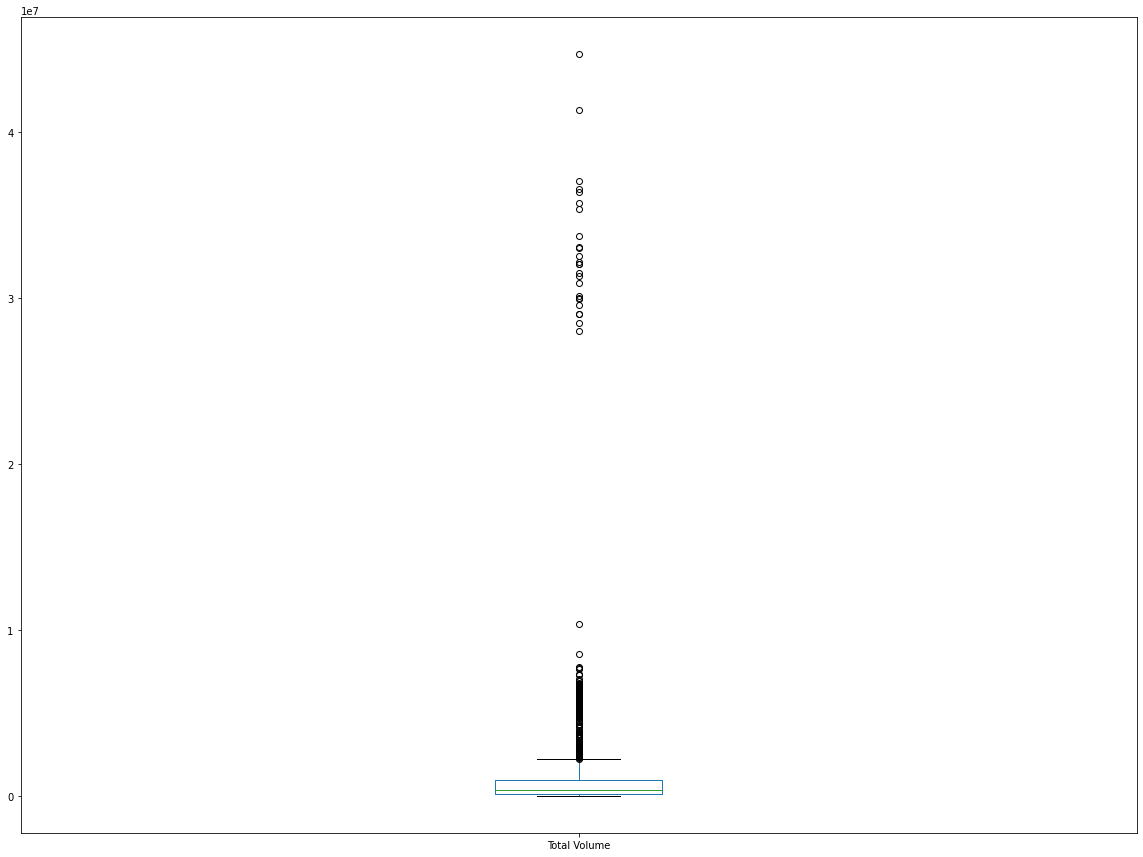

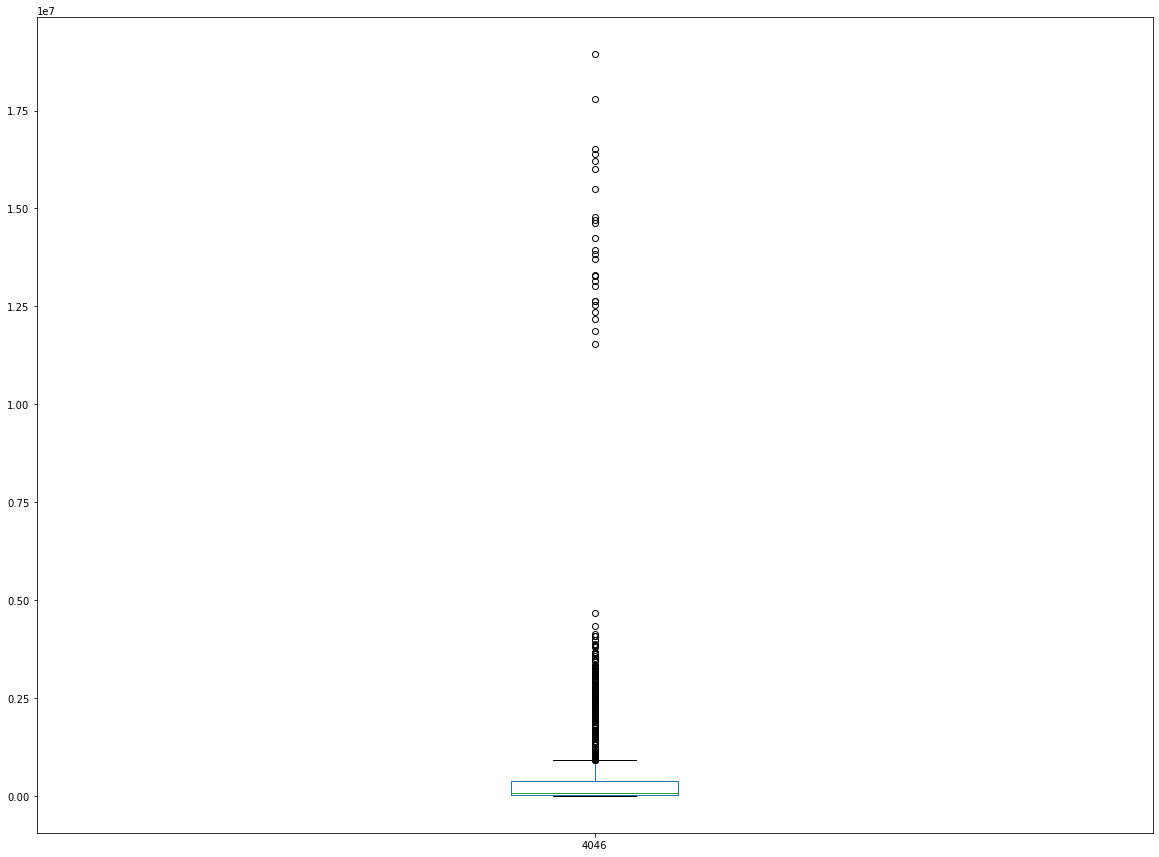

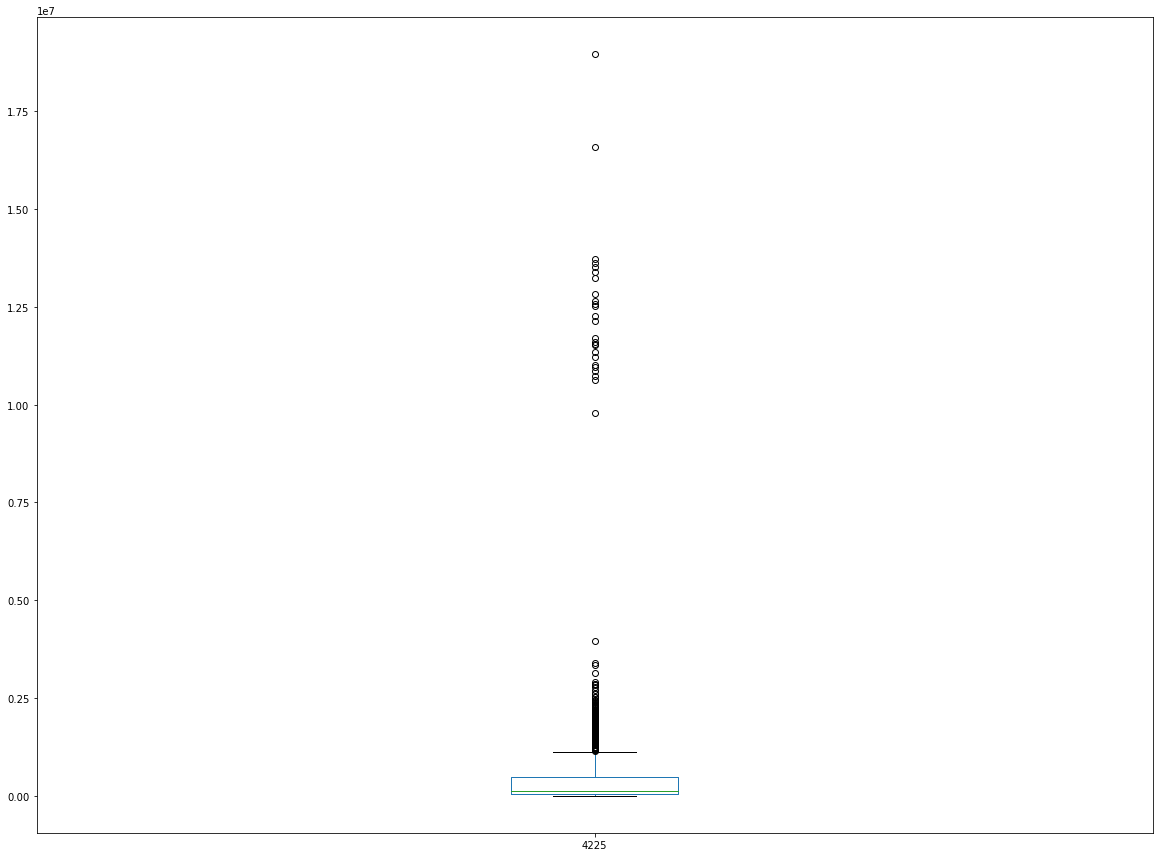

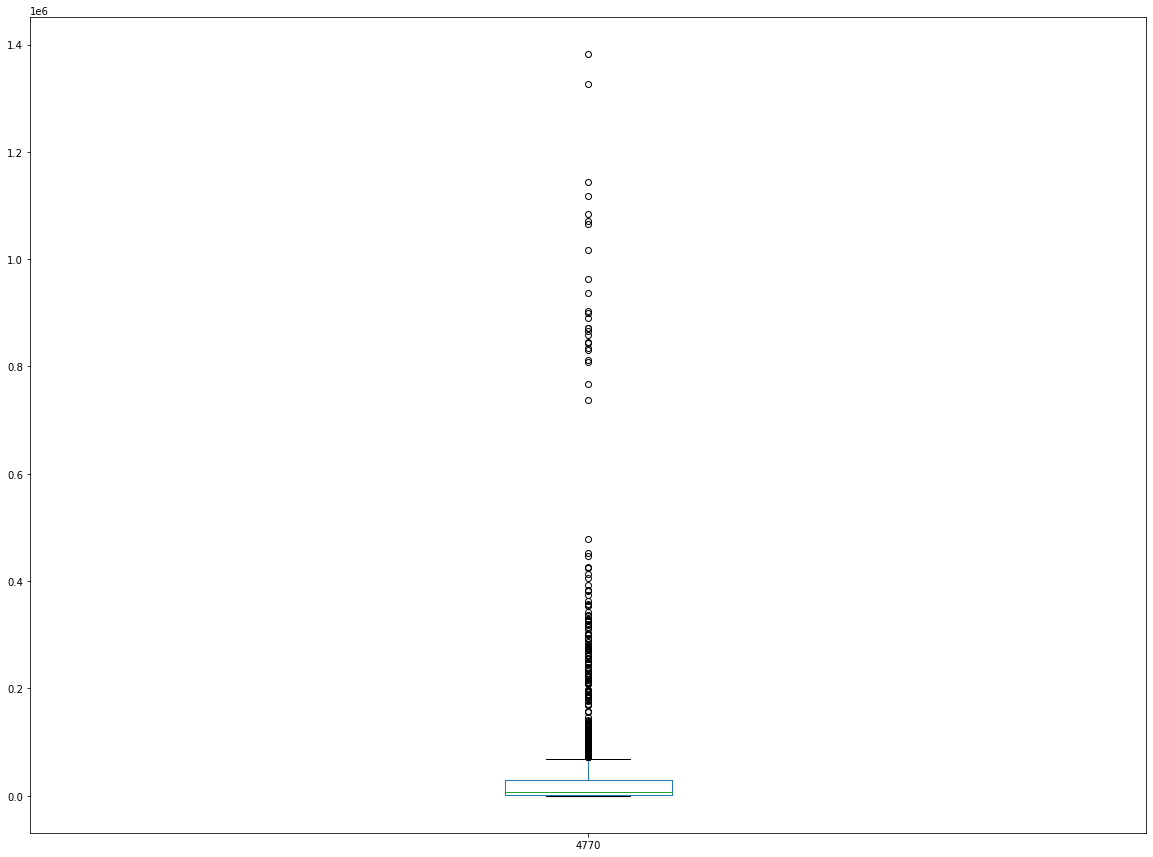

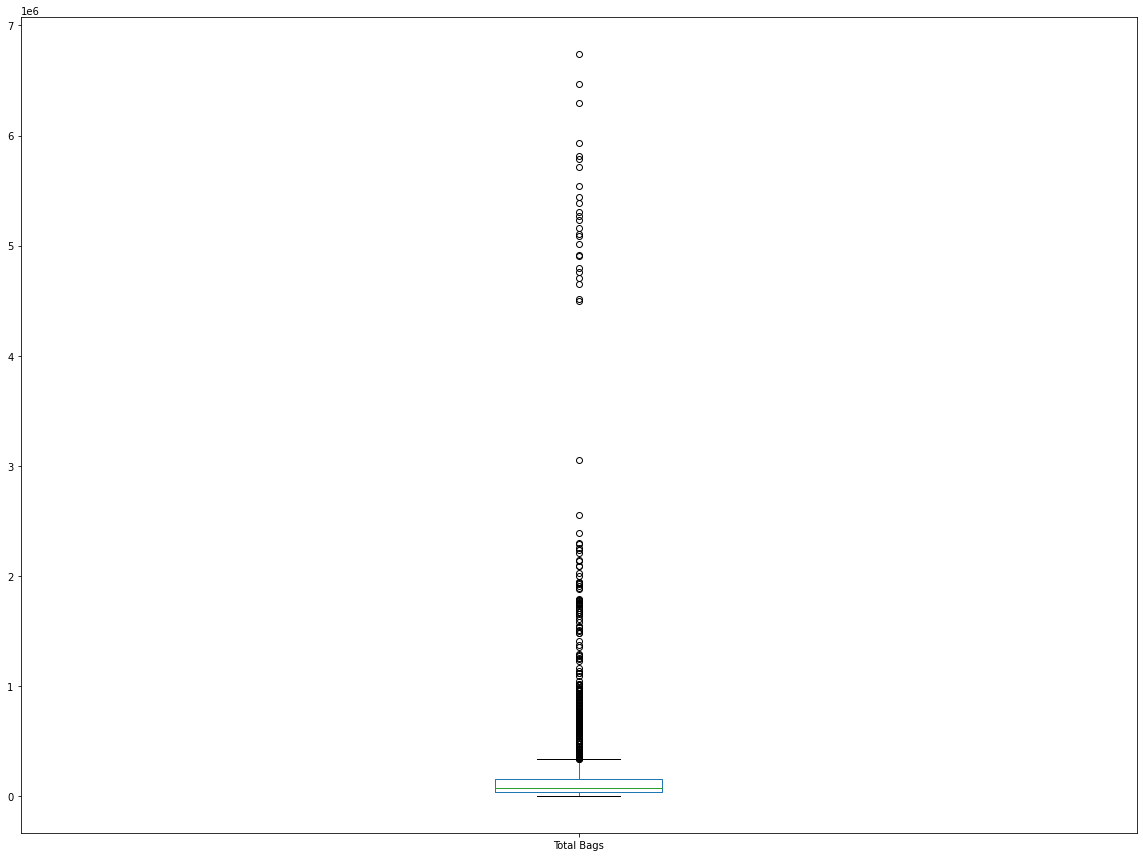

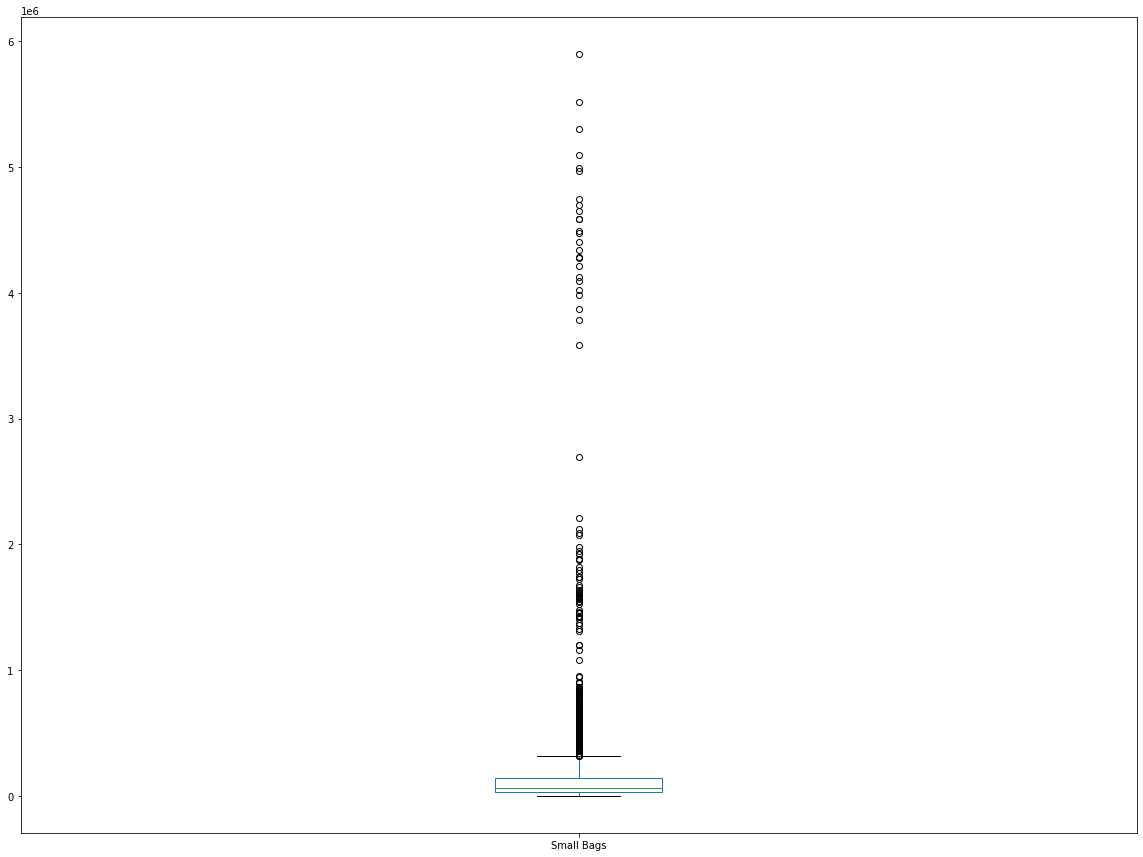

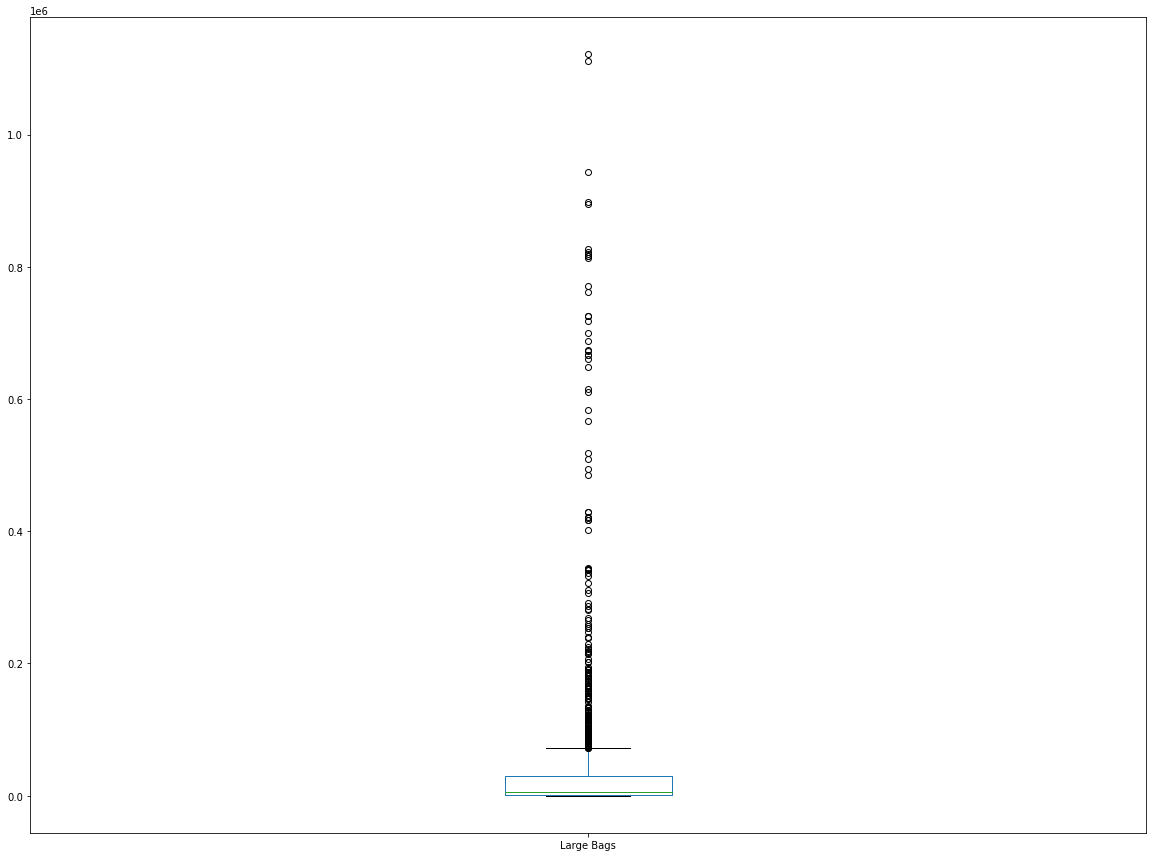

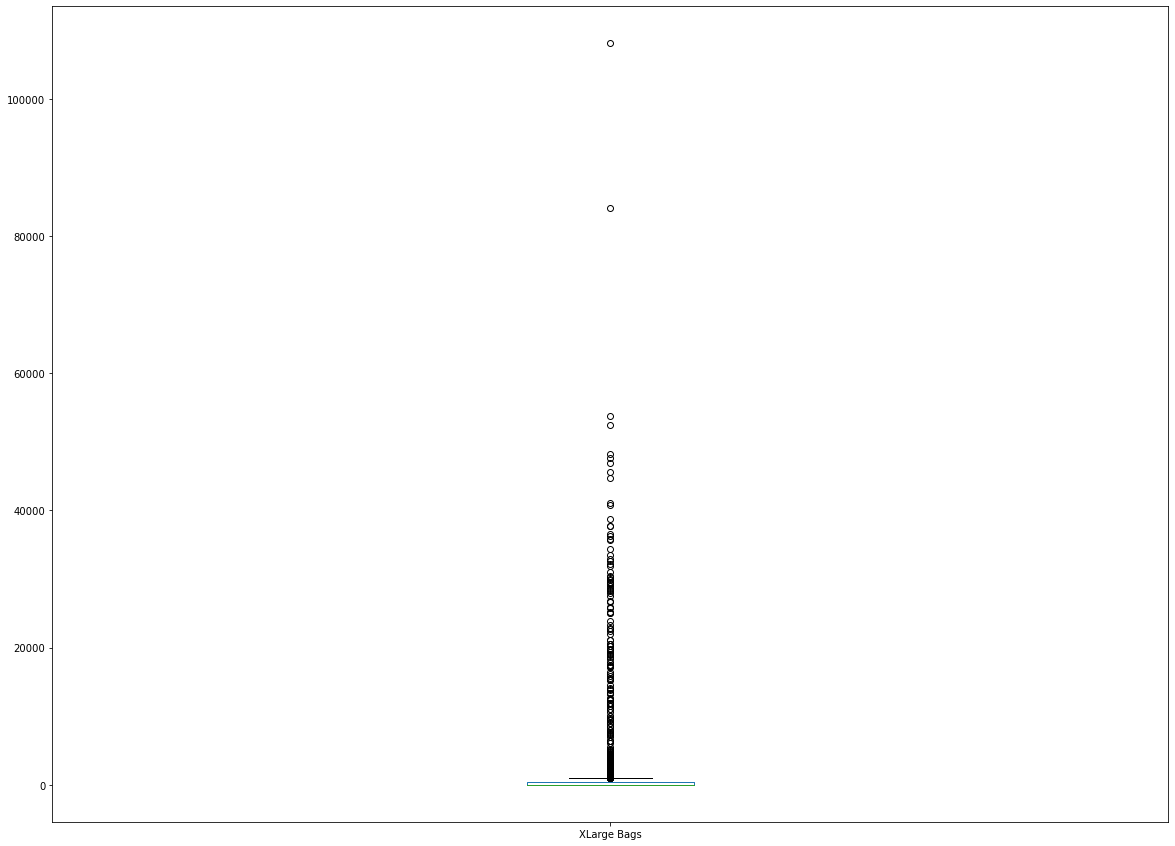

In [22]:
for i in cont_cols:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

There are too many outliers present in the dataset. We will use z-score to treat these outliers.

In [23]:
from scipy.stats import zscore
z = np.abs(zscore (df[cont_cols]))
z

array([[0.34696593, 0.33149016, 0.33305294, ..., 0.37105465, 0.36004386,
        0.29272731],
       [0.34907791, 0.33167633, 0.33892254, ..., 0.3698118 , 0.36000798,
        0.29272731],
       [0.33478463, 0.33161448, 0.30034767, ..., 0.37192201, 0.35996017,
        0.29272731],
       ...,
       [0.32120275, 0.30820887, 0.33398664, ..., 0.30194984, 0.29095317,
        0.1820374 ],
       [0.31878364, 0.30423037, 0.33356795, ..., 0.29836419, 0.29078309,
        0.29272731],
       [0.3201721 , 0.30987728, 0.33320927, ..., 0.29557902, 0.26226571,
        0.29272731]])

In [24]:
threshold = 3
print (np.where(z>3))

(array([ 398,  401,  409,  412,  412, 1016, 1017, 1059, 1182, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183, 1183,
       1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185, 1185,
       1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186, 1186,
       1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188, 1188,
       1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1191,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192, 1192,
       1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193, 1194,
       1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196, 1197,
       1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199, 1200,
       1200, 1200, 1200, 1200, 1200, 1200, 1201, 1

In [25]:
df_new = df [(z<3).all(axis = 1)]

In [26]:
df_new.shape

(1439, 13)

All rows having z-score of more than 3 were dropped from the data.

81 rows dropped from the dataset.

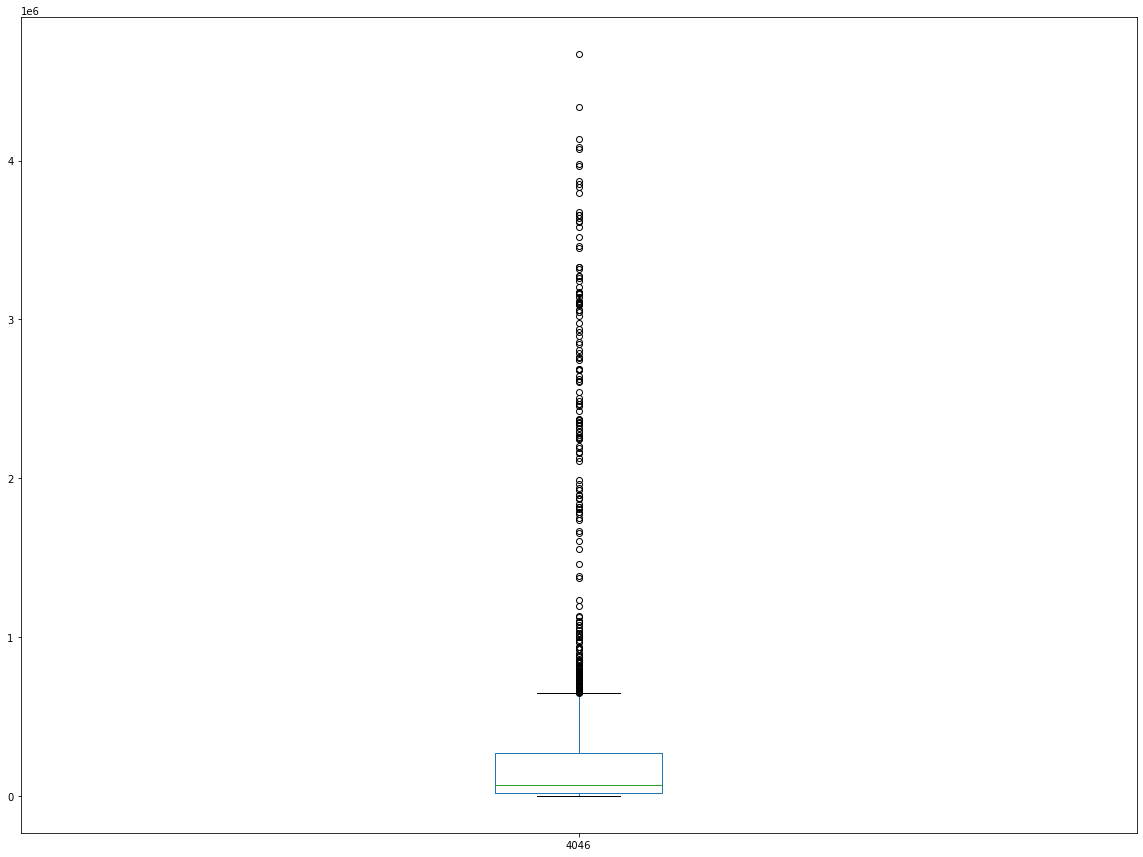

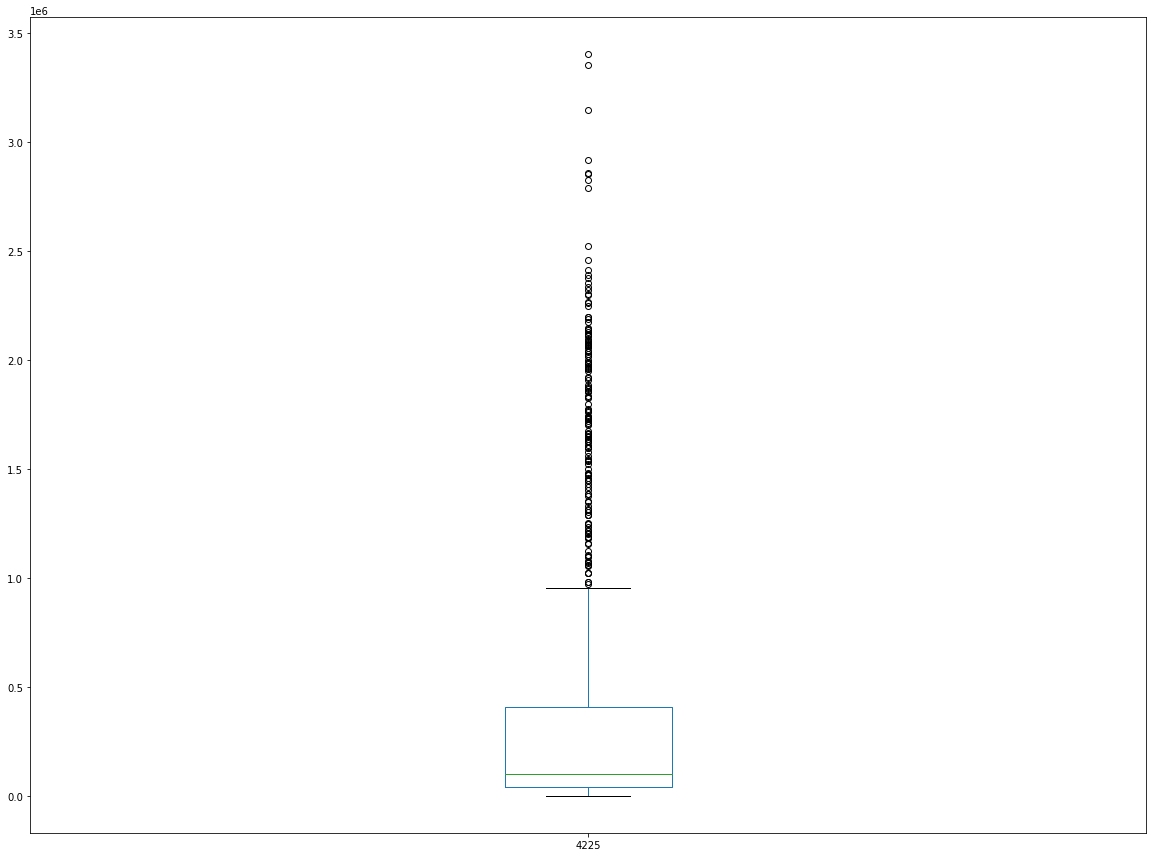

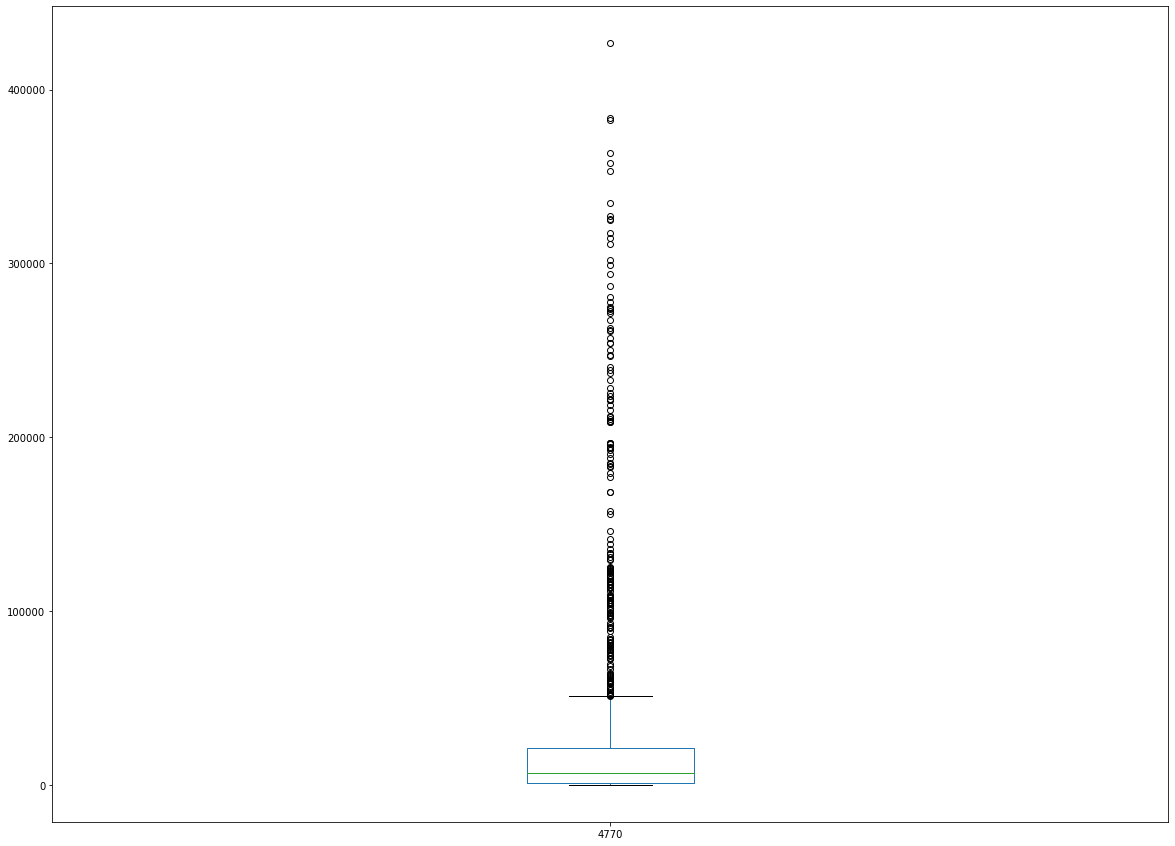

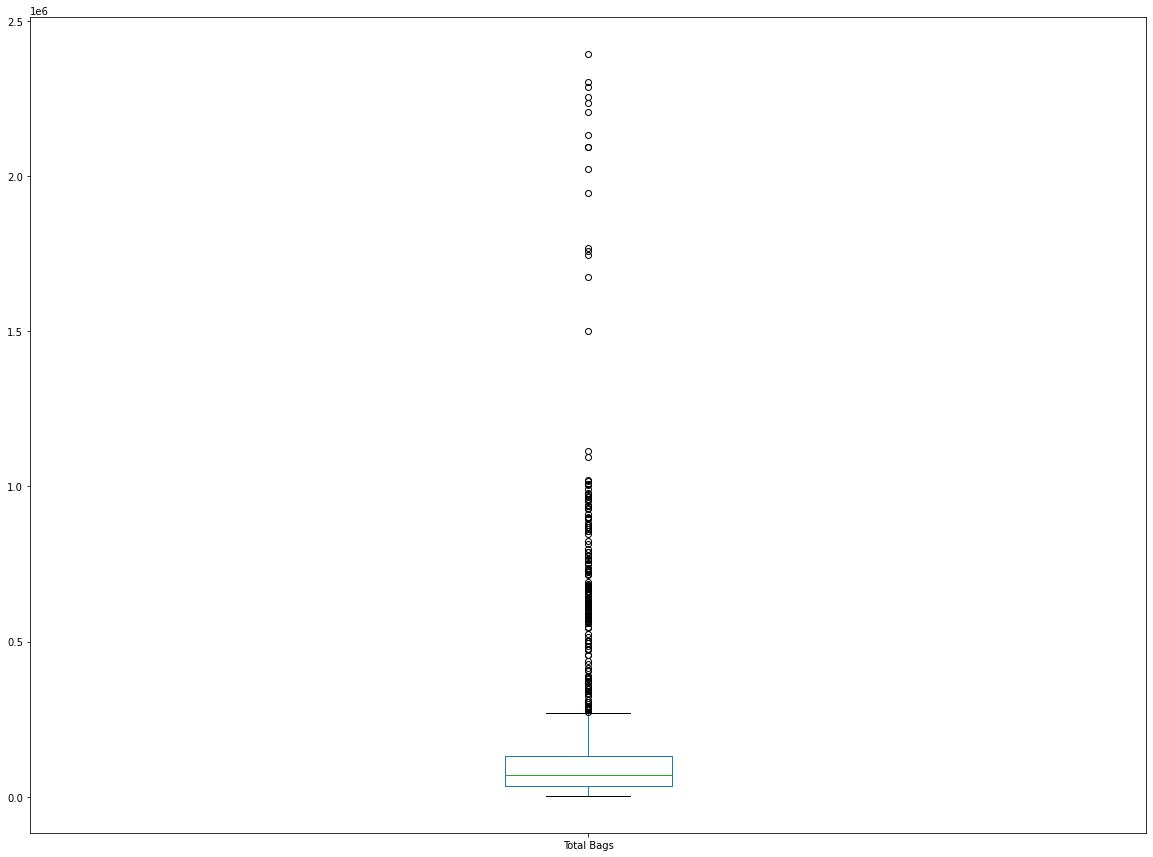

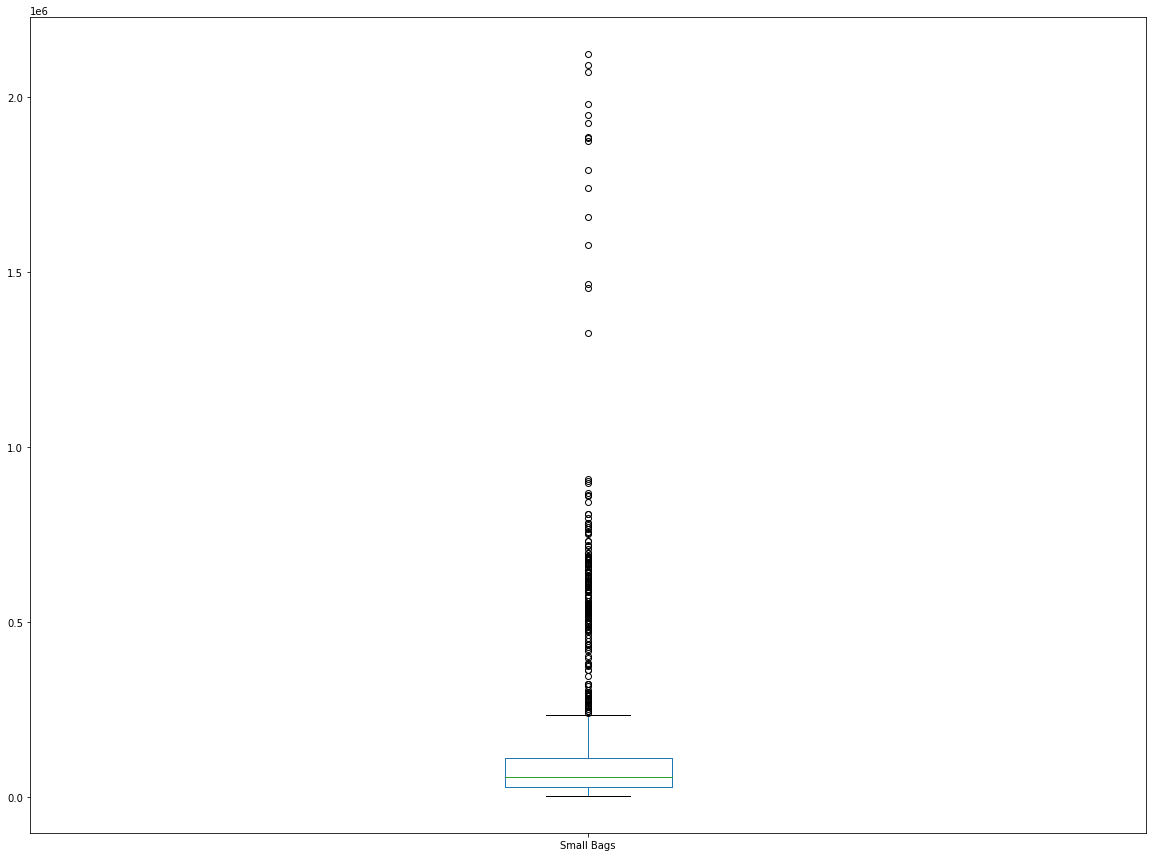

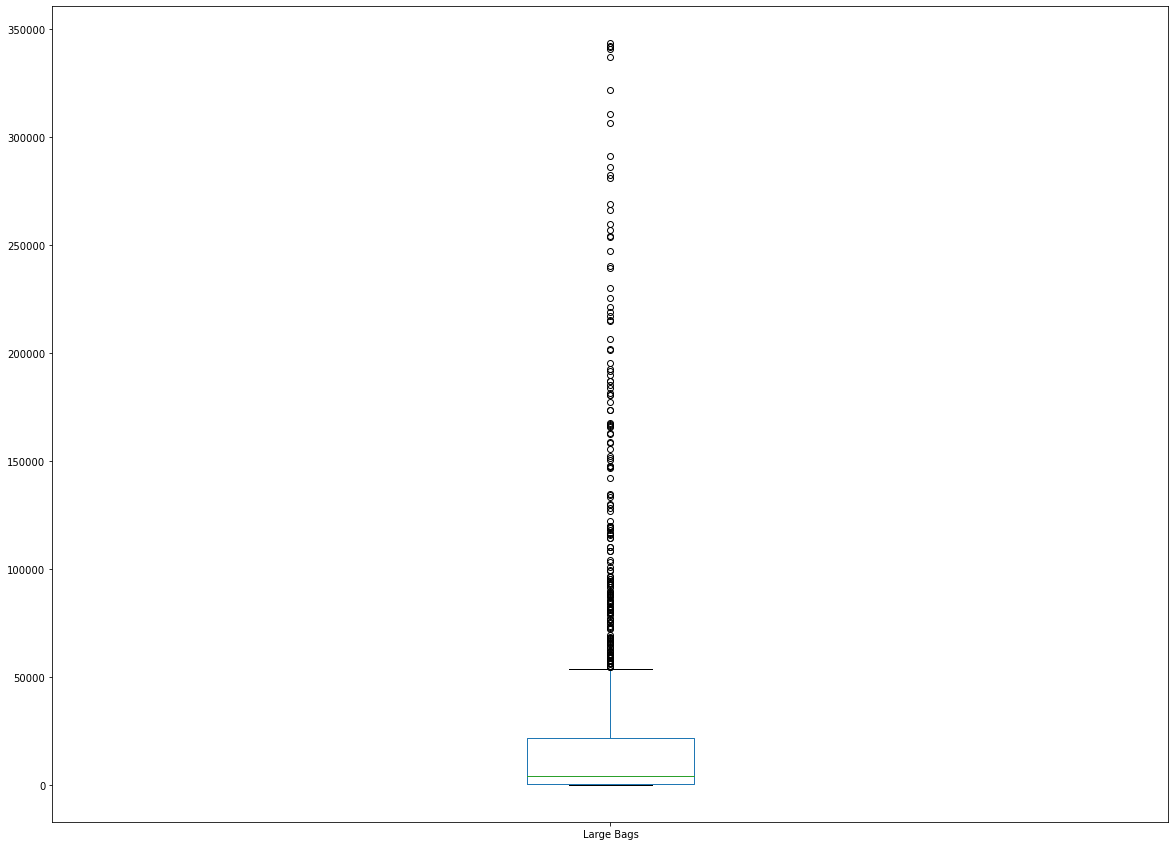

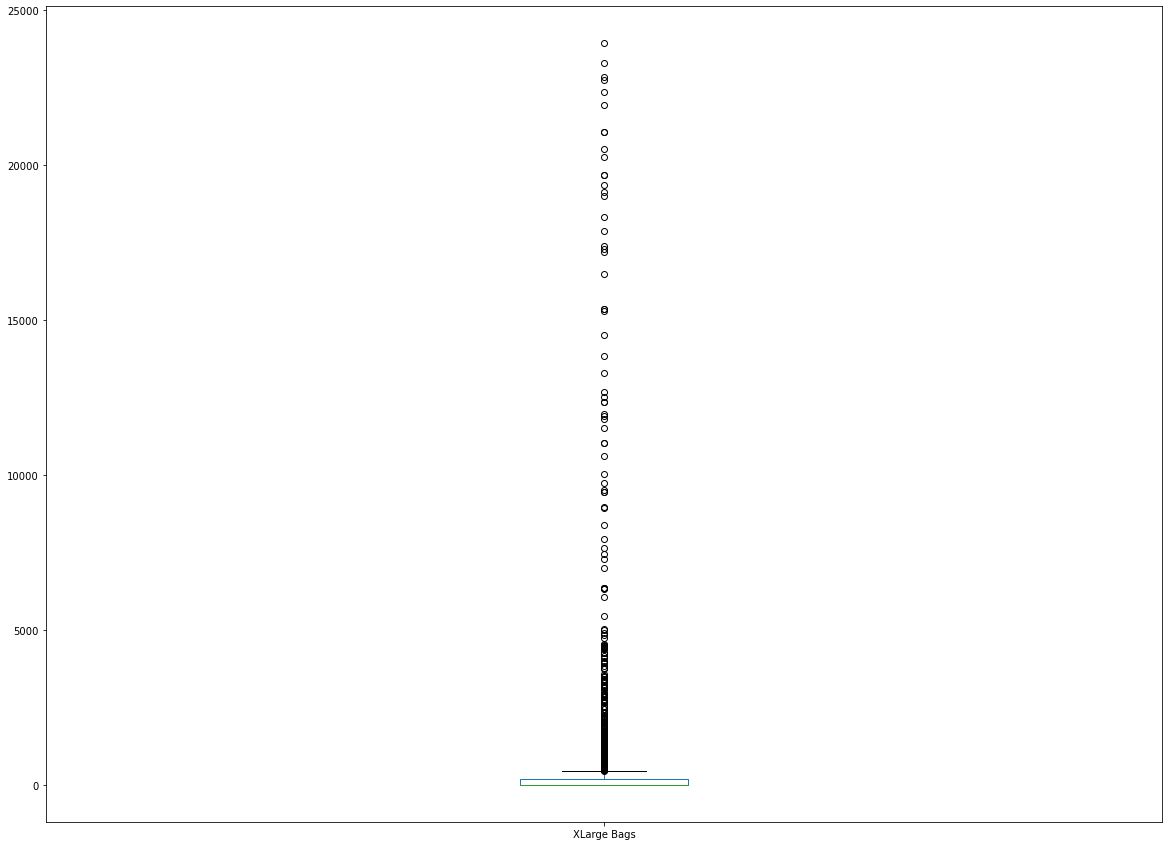

In [27]:
for i in cont_cols[1:]:
    plt.figure(figsize = (20, 15))
    df_new[i].plot.box()

In [28]:
df_new.skew()

Unnamed: 0     -0.246136
AveragePrice   -0.164097
Total Volume    2.699607
4046            3.117671
4225            2.364213
4770            3.329694
Total Bags      4.153979
Small Bags      4.394953
Large Bags      3.521463
XLarge Bags     5.107058
year            1.992181
Month           0.244263
dtype: float64

Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, Xlarge Bags all have skewness above the threshold value of +-0.5.

In [29]:
from sklearn.preprocessing import power_transform        #removing skewness
df_new[cont_cols] = power_transform(df_new[cont_cols], method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = df_new.columns)

In [30]:
df_new.skew()


Unnamed: 0     -0.246136
AveragePrice   -0.164097
Total Volume    0.000000
4046           -0.026242
4225            0.000767
4770           -0.055180
Total Bags      0.000000
Small Bags      0.000000
Large Bags     -0.118151
XLarge Bags     0.478894
year            1.992181
Month           0.244263
dtype: float64

In [31]:
x = df_new.drop('AveragePrice', axis = 1)
y = df_new['AveragePrice']

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['region'] = label_encoder.fit_transform(x['region'])

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

# Best Random State

In [35]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.4050605361871633 on Random State 75


# Creating Train Test Split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 75)

In [38]:
LR = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = [LR, dt, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (r2_score(y_test, pred))
    print (mean_squared_error(y_test, pred))
    print (mean_absolute_error(y_test, pred))

LinearRegression()
0.4050605361871633
0.02311736615368914
0.11796089249103385
DecisionTreeRegressor()
0.653421193823901
0.01346689814814815
0.07891203703703703
RandomForestRegressor()
0.8083933145504105
0.007445197662037041
0.06049097222222221


In [39]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LinearRegression()  model is : -7963116077026.239
 
Cross Validation Score for  DecisionTreeRegressor()  model is : -0.9720999551577185
 
Cross Validation Score for  RandomForestRegressor()  model is : -0.0019720075180380105
 


Difference between R2 score and cross validation score is least in Random Forest model, hence we'll work on Random Forest Model.

# Hypertuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [42]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [43]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [44]:
rfr = RandomForestRegressor(random_state=75, max_features='sqrt', n_estimators= 200, max_depth=8, criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))
print (mean_absolute_error(y_test, predrfr))

0.7798245899135952
0.008555283155005698
0.06956819097598108


In [45]:
cvs = cross_val_score(rfr, x, y, cv = 5)
print ('Cross Validation Score for ',rfr, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=200,
                      random_state=75)  model is : 0.23695658325545357


After hypertuning with GridSearchCV the difference between R2 score and cross validation score decreased, with rise in cross val score.

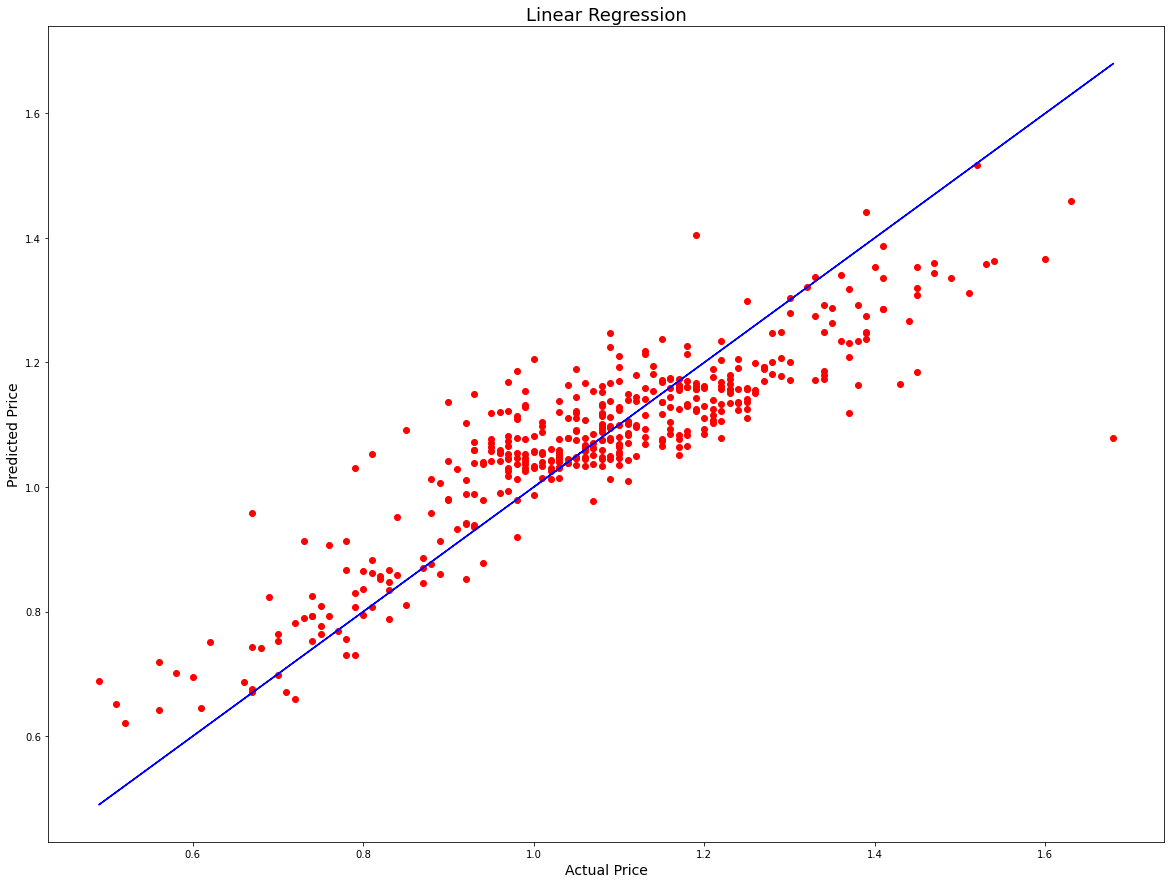

In [46]:
plt.figure(figsize = (20, 15))
plt.scatter(x = y_test, y = predrfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Price', fontsize = 14)
plt.ylabel('Predicted Price', fontsize = 14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

The blue line represents the actual values while the red dotes are the predicted values.

In [47]:
import pickle

filename = 'AvocadoRfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))

# Conclusion

In [48]:
loaded_model = pickle.load(open('AvocadoRfr.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.7798245899135952


In [49]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predrfr[:]], index = ['Predicted', 'Original'])

In [50]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
Predicted,1.167051,0.687202,0.988131,1.189221,1.046323,1.113747,1.179704,1.085622,0.756339,1.046549,...,0.932931,1.08346,0.753317,1.119016,1.135009,0.882599,1.054283,1.031225,1.118845,1.033884
Original,1.167051,0.687202,0.988131,1.189221,1.046323,1.113747,1.179704,1.085622,0.756339,1.046549,...,0.932931,1.08346,0.753317,1.119016,1.135009,0.882599,1.054283,1.031225,1.118845,1.033884
